## Feature Selection using LASSO TCR-peptide interaction


In [ ]:

#!apt install python3.10-venv



In [ ]:
#!python -m venv /content/drive/MyDrive/colab_env  # Replace 'colab_env' with your desired name
#!source /content/drive/MyDrive/colab_env/bin/activate  # Replace 'colab_env' accordingly

!pip install import-ipynb

!pip install propy3

In [ ]:
import pandas as pd
from multiprocessing import Pool
import re
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
#import pingouin as pg
#print(sklearn.__version__)
#import import_ipynb
#from PPI_functions import *
from scipy.stats import ks_2samp
from statsmodels.stats.weightstats import ztest as ztest

1.26.4
2.2.2
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
%load_ext google.colab.data_table
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('path')

# Explicitly load and run the notebook
%run "/path/PPI_functions.ipynb"

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Mounted at /content/drive
1.26.4
2.2.2
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


# 1) Data Preprocessing

In [ ]:
tcr='5cc7'
threshold_value=23

feature='propy'
sublabel='(b)'
color_s='green'
#path='/home/hamid/Documents/TCR_ML/data/'
path='/path/data/'
df0 = pd.read_csv(path +'new_'+tcr+'_uniques.csv')
df0.head()

,peptide_name,sequence,round1,round2,round3,round4,round5
0,peptide0,ADGVGFLKAASKR,10,11,11984,99513,163019
1,peptide1,AAQVAFLKAATKA,14,15,19721,148655,186297
2,peptide2,AAGVAFFRVPYKE,1,4,4042,24818,38599
3,peptide3,ANGVAFFLTPFKA,24,24,27277,201208,238583
4,peptide4,ANLVAFFRSPYKA,0,3,2978,19718,5394




*   List item
*   List item



def write_to_text_file(df, file_path):
    with open(file_path, 'w') as file:
        for index, row in df.iterrows():
            file.write(f'>{row["peptide_name"]}\n{row["sequence"]}\n')


In [ ]:
# Select first %10 of the peptides

In [ ]:
# feature extraction using propy
new_df = df0.iloc[:30000]
ddf1=new_df.drop(columns=['sequence'])
new_df

,peptide_name,sequence,round1,round2,round3,round4,round5
0,peptide0,ADGVGFLKAASKR,10,11,11984,99513,163019
1,peptide1,AAQVAFLKAATKA,14,15,19721,148655,186297
2,peptide2,AAGVAFFRVPYKE,1,4,4042,24818,38599
3,peptide3,ANGVAFFLTPFKA,24,24,27277,201208,238583
4,peptide4,ANLVAFFRSPYKA,0,3,2978,19718,5394
...,...,...,...,...,...,...,...
29995,peptide29995,SDCVSRRVVSLKG,0,0,1,0,0
29996,peptide29996,ANGIGYFRRPYKR,0,0,1,0,0
29997,peptide29997,ANDVLGDLHSSKE,0,0,1,0,0
29998,peptide29998,ADRIIMVTVAAKD,0,0,1,0,0


In [ ]:
#feature extraction using propy
#peptide_list='seq.txt'
#Descriptors_complete(peptide_list,'seq_descriptors.csv')
new_df

,peptide_name,sequence,round1,round2,round3,round4,round5
0,peptide0,ADGVGFLKAASKR,10,11,11984,99513,163019
1,peptide1,AAQVAFLKAATKA,14,15,19721,148655,186297
2,peptide2,AAGVAFFRVPYKE,1,4,4042,24818,38599
3,peptide3,ANGVAFFLTPFKA,24,24,27277,201208,238583
4,peptide4,ANLVAFFRSPYKA,0,3,2978,19718,5394
...,...,...,...,...,...,...,...
29995,peptide29995,SDCVSRRVVSLKG,0,0,1,0,0
29996,peptide29996,ANGIGYFRRPYKR,0,0,1,0,0
29997,peptide29997,ANDVLGDLHSSKE,0,0,1,0,0
29998,peptide29998,ADRIIMVTVAAKD,0,0,1,0,0


In [ ]:
# Select which features you want to consider, propy or tripeptides
if feature=='trip':
    df1=pd.read_csv(path+'20k_'+tcr+'_'+feature+'.csv')
elif feature=='propy':
    df=pd.read_csv(path+'30k_'+tcr+'_'+feature+'.csv')
    df1=df.drop(columns=['Unnamed: 0'])

df1.head()

,AMP_Name,net_charge,A,R,N,D,C,E,Q,G,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,peptide0,1,23.077,7.692,0.000,7.692,0.0,0.000,0.000,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,peptide1,2,46.154,0.000,0.000,0.000,0.0,0.000,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,peptide2,2,23.077,7.692,0.000,0.000,0.0,7.692,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,peptide3,1,23.077,0.000,7.692,0.000,0.0,0.000,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,peptide4,2,23.077,7.692,7.692,0.000,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Assuming you have already loaded your data into df1 and df2

# Merge df1 with df2 based on "AMP_Name", keeping only rows from df1
#merged_df = pd.merge(df1, df2, on="AMP_Name", how="left")

#merged_df

In [ ]:
df1.rename(columns={'AMP_Name': 'peptide_name'}, inplace=True)


In [ ]:
ddf1.set_index('peptide_name', inplace=True)
df1.set_index('peptide_name', inplace=True)
merged_df2 = pd.concat([ddf1, df1], axis=1)
merged_df2

,round1,round2,round3,round4,round5,net_charge,A,R,N,D,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
peptide_name,,,,,,,,,,,,,,,,,,,,,
peptide0,10,11,11984,99513,163019,1,23.077,7.692,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
peptide1,14,15,19721,148655,186297,2,46.154,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
peptide2,1,4,4042,24818,38599,2,23.077,7.692,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
peptide3,24,24,27277,201208,238583,1,23.077,0.000,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
peptide4,0,3,2978,19718,5394,2,23.077,7.692,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peptide29995,0,0,1,0,0,2,23.077,7.692,0.000,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
peptide29996,0,0,1,0,0,3,15.385,0.000,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
peptide29997,0,0,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filtering rows that contain at least one NaN value
df=merged_df2
rows_with_nan = df[df.isnull().any(axis=1)]

#print(rows_with_nan)

In [ ]:
# Removing rows with at least one NaN value
df_cleaned1 = merged_df2.dropna()

# Resetting the index
df_cleaned1.reset_index(drop=True, inplace=True)

In [ ]:
#df_cleaned1=df_cleaned0.head(1000)
df_cleaned1

,round1,round2,round3,round4,round5,net_charge,A,R,N,D,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,10,11,11984,99513,163019,1,23.077,7.692,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,15,19721,148655,186297,2,46.154,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,4,4042,24818,38599,2,23.077,7.692,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24,24,27277,201208,238583,1,23.077,0.000,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,2978,19718,5394,2,23.077,7.692,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,0,0,1,0,0,4,0.000,15.385,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29993,0,0,1,0,0,0,7.692,23.077,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29994,0,0,2,0,0,2,7.692,0.000,7.692,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29995,0,0,1,0,0,2,23.077,7.692,0.000,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Classify peptides based on values of round5

In [ ]:
Tr=threshold_value
df_cleaned = df_cleaned1.drop(['round1', 'round2', 'round3', 'round4'], axis=1)
df_cleaned['class'] = df_cleaned['round5'].apply(lambda x: 1 if x > Tr else 0)
df_cleaned


,round5,net_charge,A,R,N,D,C,E,Q,G,...,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,class
0,163019,1,23.077,7.692,0.000,7.692,0.000,0.000,0.000,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,186297,2,46.154,0.000,0.000,0.000,0.000,0.000,7.692,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,38599,2,23.077,7.692,0.000,0.000,0.000,7.692,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,238583,1,23.077,0.000,7.692,0.000,0.000,0.000,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5394,2,23.077,7.692,7.692,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,0,4,0.000,15.385,0.000,7.692,7.692,0.000,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29993,0,0,7.692,23.077,7.692,0.000,0.000,0.000,0.000,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29994,0,2,7.692,0.000,7.692,15.385,0.000,7.692,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29995,0,2,23.077,7.692,0.000,15.385,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:

df=df_cleaned
# Count the instances of each class
counts = df['class'].value_counts()

# Determine the number of samples to match based on the max number of 1s
n_samples = min(counts[1], counts[0])  # In case you want to balance it based on the minority class

# Create a balanced DataFrame
df_0 = df[df['class'] == 0].sample(n_samples, random_state=42)  # Sample from class 0
df_1 = df[df['class'] == 1].sample(n_samples, random_state=42)  # Sample from class 1

# Combine the two DataFrames to get a balanced dataset
df_balanced = pd.concat([df_0, df_1])
df_reset = df_balanced.reset_index(drop=True)



In [ ]:
df_reset.shape

(468, 1550)

In [ ]:
df_reset

,round5,net_charge,A,R,N,D,C,E,Q,G,...,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,class
0,0,4,23.077,7.692,7.692,0.000,0.000,0.000,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,2,15.385,0.000,7.692,7.692,0.000,0.000,0.000,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,2,15.385,7.692,7.692,0.000,0.000,7.692,7.692,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,3,30.769,0.000,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,1,23.077,0.000,7.692,0.000,0.000,0.000,0.000,15.385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,50,1,38.462,0.000,7.692,0.000,0.000,0.000,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
464,6895,1,15.385,0.000,0.000,7.692,0.000,0.000,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
465,122,1,23.077,0.000,7.692,0.000,0.000,7.692,7.692,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
466,27,1,23.077,7.692,0.000,0.000,0.000,15.385,0.000,7.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#df_reset[df_reset['class'] == 1].count()


In [ ]:
def normalized_df(df):

    from sklearn.preprocessing import MinMaxScaler
    #df0=df.drop(columns=['AMP_Name'])
    df0=df
    scaler = MinMaxScaler()
    df_normalized = scaler.fit_transform(df0)
    scaled_features_df = pd.DataFrame(df_normalized, index=df0.index, columns=df0.columns)

    return scaled_features_df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Define your features
X1 = df_reset.drop(['class', 'round5'], axis=1)
#X2 = normalized_df(X1) 
XX = np.array(X1)
X = np.array(XX)

# Define your target#
y1 = df_reset['class']
y = np.array(y1)
klist = np.array(X1.columns)



In [ ]:
X1

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,4,23.077,7.692,7.692,0.000,0.000,0.000,0.000,7.692,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,15.385,0.000,7.692,7.692,0.000,0.000,0.000,15.385,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,15.385,7.692,7.692,0.000,0.000,7.692,7.692,7.692,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30.769,0.000,0.000,0.000,7.692,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,23.077,0.000,7.692,0.000,0.000,0.000,0.000,15.385,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1,38.462,0.000,7.692,0.000,0.000,0.000,0.000,7.692,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,1,15.385,0.000,0.000,7.692,0.000,0.000,0.000,7.692,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,1,23.077,0.000,7.692,0.000,0.000,7.692,7.692,7.692,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,1,23.077,7.692,0.000,0.000,0.000,15.385,0.000,7.692,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df_reset.iloc[0:5,0:4]
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
## now we check if model overfits

# 3) Feature Selection Using LASSO

In [ ]:
ns=18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv = cross_val_split(X,y,ns)


In [ ]:
# now we normalize traning and test sets
from sklearn.preprocessing import MinMaxScaler

for i in range(len(Xtrain_cv)):
    scaler = MinMaxScaler()
    Xtrain_cv[i]  = scaler.fit_transform(Xtrain_cv[i])
    Xtest_cv[i]  = scaler.fit_transform(Xtest_cv[i])
    #print(Xtrain_cv[i])


In [ ]:
def lasso_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist):
    from sklearn.linear_model import Lasso
    import numpy as np
    listlocs = list(range(ns))
    results = list(range(ns))
    kfeatures = list(range(ns))
    kweights = list(range(ns))

    bagging_dict = {}
    model = Lasso(alpha = CC)
    for i in range(ns):

        X_train = Xtrain_cv[i]
        Y_train = Ytrain_cv[i]

        model.fit(X_train, Y_train)
        #print(i)
        #print(model.coef_)
        T = model.coef_
        #print(i)
        #print(T)
        TT = list(T)
        locs = np.where(abs(T) > 0)
        listlocs[i] = np.asarray(locs)

        if i == 0:
            flistlocs = listlocs[i]
            flistlocs=flistlocs[0]
        else:
            flistlocs = np.intersect1d(flistlocs,listlocs[i])


        for f in flistlocs:
            f_feature = klist[f]
            f_weight = T[f]

            if i == 0:
                bagging_dict[f_feature] = []
                bagging_dict[f_feature].append(f_weight)
            else:
                bagging_dict[f_feature].append(f_weight)

        kfeatures[i] = klist[listlocs[i]]
        kweights[i] = T[listlocs[i]]

    kfeatures=klist[flistlocs]
    featuredict={}
    for k,v in bagging_dict.items():
        if k in kfeatures:
            print(k, sum(v)/len(v))
            featuredict[k]=sum(v)/len(v)
    return featuredict

In [ ]:
AA=0.01

ns = 18
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

ADG 0.10362273525614205
AFF 0.13136010090819064
ANG 0.12319641002796516
FKA 0.08948219842438136
FLK 0.1683027356911987
LKA 0.20595109414490764
PFK 0.15615876255483466
PYK 0.15306296537821118
TKA 0.1284641643980612
VAF 0.26121992593916143


{'ADG': 0.10362273525614205,
 'AFF': 0.13136010090819064,
 'ANG': 0.12319641002796516,
 'FKA': 0.08948219842438136,
 'FLK': 0.1683027356911987,
 'LKA': 0.20595109414490764,
 'PFK': 0.15615876255483466,
 'PYK': 0.15306296537821118,
 'TKA': 0.1284641643980612,
 'VAF': 0.26121992593916143}

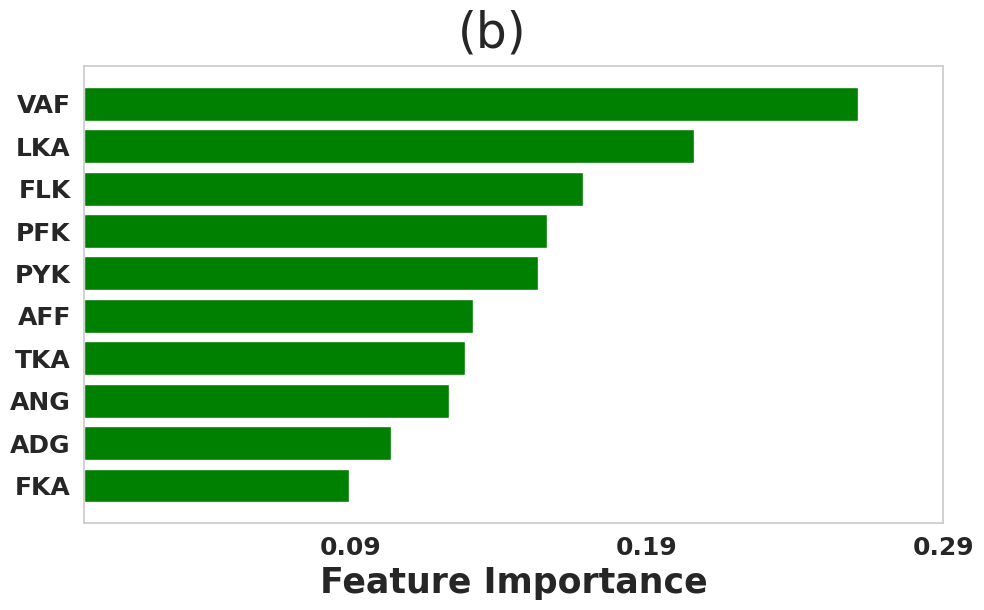

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "/path"
featuredict = featuredict_lasso  
dr = 0.1 
fonts = 25  

# Sorting and processing feature dictionary
sorted_features = sorted(featuredict.items(), key=lambda x: x[1], reverse=False)
feature_name = []
feature_coef = []

for name, coef in sorted_features:
    if name.startswith("_"):
        name = name[1:]  
    feature_name.append(name)
    feature_coef.append(coef)

# Plot of feature importance
fig, ax = plt.subplots(figsize=(10, 6)) 
plt.barh(feature_name, feature_coef, color=color_s, alpha=1)
ax.set_xticks(np.arange(np.round(min(feature_coef), 2), np.round(max(feature_coef), 2) + dr, dr))

# Set grid and labels
plt.grid(False)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Label and title settings
plt.xlabel("Feature Importance", fontsize=fonts, fontweight='bold')
plt.figtext(0.5, 0.95, sublabel, size=35, ha='center') 
plt.tick_params(labelsize=18)

# Set layout before saving to avoid clipping
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to give space for figtext
plt.savefig(path + 'Features_' + feature + '_' + tcr + '.pdf', format='pdf', bbox_inches='tight')  # Save with tight bounding box
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
# Your initial setup
ns=10

scaled_features_df=X1
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
i=0
for train_index, test_index in cv.split(XX, y):
    #X_train, X_test = XX[train_index], XX[test_index]
    #Y_train, Y_test = y[train_index], y[test_index]
    Xtrain_cv[i] = X[train_index]
    Xtest_cv[i] = X[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    #print(X_test)
    scaler = MinMaxScaler()
    Xtrain_cv[i]  = scaler.fit_transform(Xtrain_cv[i])
    Xtest_cv[i]  = scaler.fit_transform(Xtest_cv[i])
    #print(Xtest_cv[i])
    
    fold_num += 1  # Increment the fold counter
    i+=1
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    results = models_overfitting(Xtrain_cv[i] , Ytrain_cv[i], Xtest_cv[i], Ytest_cv[i])
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']



Processing cross validation for fold: 1
Logistic Regression train_precision: 0.9347
Logistic Regression test_precision: 0.8125
Logistic Regression train_accuracy: 0.9626
Logistic Regression test_accuracy: 0.8191
Logistic Regression train_recall: 0.9626
Logistic Regression test_recall: 0.8191
Logistic Regression train_mcc: 0.9270
Logistic Regression test_mcc: 0.6384
Logistic Regression train_f1: 0.9637
Logistic Regression test_f1: 0.8211


SVC train_precision: 0.9340
SVC test_precision: 0.8163
SVC train_accuracy: 0.9572
SVC test_accuracy: 0.8298
SVC train_recall: 0.9572
SVC test_recall: 0.8298
SVC train_mcc: 0.9157
SVC test_mcc: 0.6602
SVC train_f1: 0.9583
SVC test_f1: 0.8333


Processing cross validation for fold: 2
Logistic Regression train_precision: 0.9300
Logistic Regression test_precision: 0.8511
Logistic Regression train_accuracy: 0.9599
Logistic Regression test_accuracy: 0.8511
Logistic Regression train_recall: 0.9599
Logistic Regression test_recall: 0.8511
Logistic Regression t

In [ ]:
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

mean accuracy for log regression is 0.8510638297872342
mean accuracy for svm is 0.8457446808510637
mean recall for log regression is 0.851063829787234
mean recall for svm is 0.8457446808510637
mean mcc for log regression is 0.704741335327214
mean mcc for svm is 0.694510086517192
mean f1 for log regression is 0.8549616487802055
mean f1 for svm is 0.8489758479433217


<ipython-input-39-17c524654a58>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)
<ipython-input-39-17c524654a58>:27: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)
<ipython-input-39-17c524654a58>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)


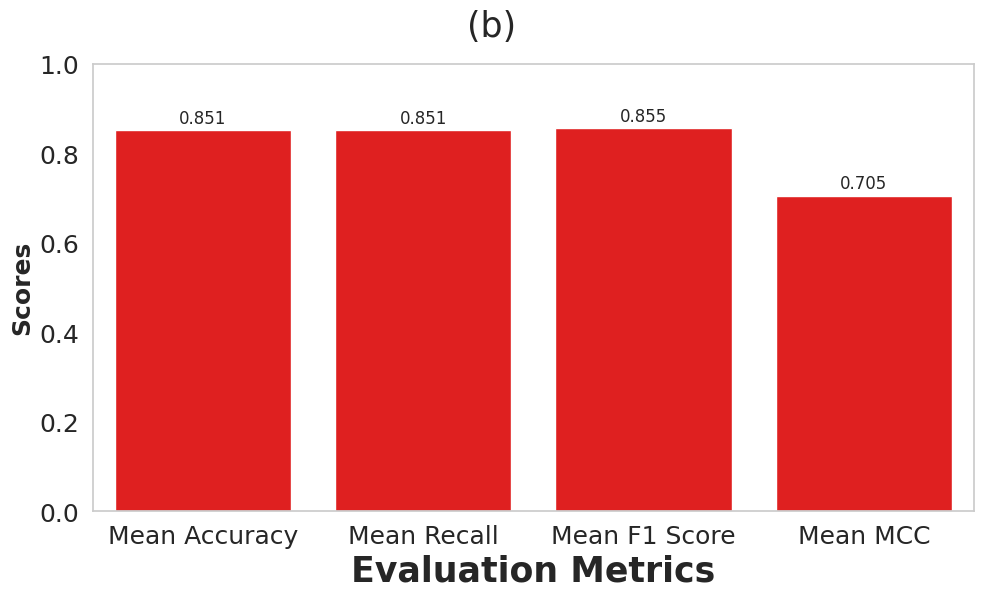

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
metrics = ['Mean Accuracy', 'Mean Recall', 'Mean F1 Score', 'Mean MCC']
log_regression = [ mean_accu_log/ns, mean_recall_log/ns, mean_f1_log/ns, mean_mcc_log/ns]


# Create a DataFrame for easy plotting
data = {
    'Metrics': metrics,
    'Logistic Regression': log_regression
}

df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Metrics', var_name='Model', value_name='Score')

# Set the plot style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Barplot with seaborn
sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)
plt.xlabel('Evaluation Metrics', fontsize=25, fontweight='bold')
plt.ylabel('Scores', fontsize=18, fontweight='bold')

plt.ylim(0, 1.0)  

# Adding the exact values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.3f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Display the plot
plt.figtext(0.5, 0.95, sublabel, size=25, ha='center')
plt.tick_params(labelsize=18)
plt.grid(False)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

# Save the figure (ensure path and filename are correct)
plt.savefig(path + 'Evaluation_' + feature + '_' + tcr + '.pdf', format='pdf')

plt.show()

In [ ]:
# The Area Under the Receiver Operating Characteristic (AUROC)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

def plot_roc_curve(df, featuredict1, y, ns):
    #fig_title = network_name + "_ROC.pdf"

    def get_roc_values(featuredict):
        cols = list(featuredict.keys())
        XX = np.array(df[cols])

        # Initialize lists to store results for each fold
        svm_tprs, svm_aucs = [], []
        mean_fpr = np.linspace(0, 1, 100)
        cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)

        for train_index, test_index in cv.split(XX, y):
            # Split data into training and testing sets
            X_train, X_test = XX[train_index], XX[test_index]
            Y_train, Y_test = y[train_index], y[test_index]
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)
            # Initialize and train SVM
            svc_model = SVC(probability=True).fit(X_train, Y_train)

            # Evaluate SVM on test data
            svm_prob = svc_model.predict_proba(X_test)[:, 1]
            svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_prob)
            svm_auc = auc(svm_fpr, svm_tpr)
            svm_tprs.append(np.interp(mean_fpr, svm_fpr, svm_tpr))
            svm_tprs[-1][0] = 0.0
            svm_aucs.append(svm_auc)

        mean_svm_tpr = np.mean(svm_tprs, axis=0)
        mean_svm_tpr[-1] = 1.0
        mean_svm_auc = np.mean(svm_aucs)

        return mean_fpr, mean_svm_tpr, mean_svm_auc

    mean_fpr1, mean_svm_tpr1, mean_svm_auc1 = get_roc_values(featuredict1)

    # Plotting the average ROC curves for both feature sets
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')  

    plt.plot(mean_fpr1, mean_svm_tpr1, color='green', label=f' LASSO features (AUC = {mean_svm_auc1:.2f})')
    plt.grid(False) 

    plt.xlabel('False positive rate', fontsize=20)
    plt.ylabel('True positive rate', fontsize=20)
    #plt.title('ROC Curve')
    #plt.figtext(0.45, 0.92, size=25)
    plt.tick_params(labelsize=18)
    plt.axis([-0.005,1,0,1])
    plt.legend(loc='best',fontsize=12)
    plt.figtext(0.53, 0.91, sublabel, size=25, ha='center')

    plt.savefig(path+'auc'+feature+'_'+tcr+'.pdf', format='pdf')

    plt.show()

    return mean_svm_auc1



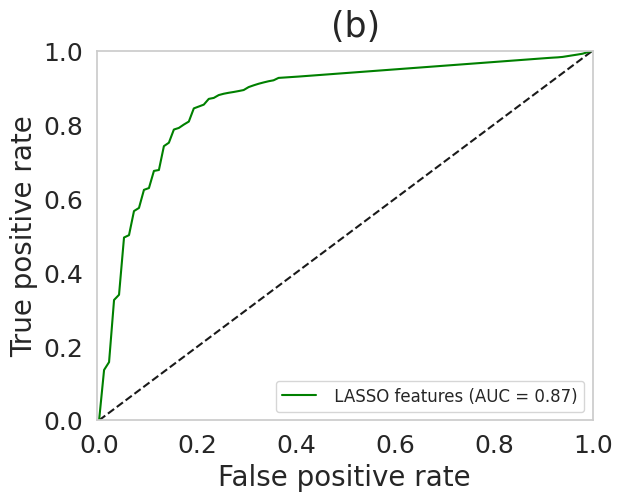

In [ ]:
mean_auc1 = plot_roc_curve(df_reset, featuredict_lasso, y,ns)


# N-gram Language Model

> Add blockquote



In [ ]:
df_cleaned = df0.drop(['round1', 'round2', 'round3', 'round4'], axis=1)
df_cleaned['class'] = df_cleaned['round5'].apply(lambda x: 1 if x > Tr else 0)
df = df_cleaned.drop('round5', axis=1)
df

,peptide_name,sequence,class
0,peptide0,ADGVGFLKAASKR,1
1,peptide1,AAQVAFLKAATKA,1
2,peptide2,AAGVAFFRVPYKE,1
3,peptide3,ANGVAFFLTPFKA,1
4,peptide4,ANLVAFFRSPYKA,1
...,...,...,...
673456,peptide673456,AALIPGMGFVIKK,0
673457,peptide673457,ADRVGRLRCSKKR,0
673458,peptide673458,ANVLRCGRSKHKK,0
673459,peptide673459,ADKLLDAGMGMKE,0


In [ ]:
# now we make sure our traning data is balanced
new_df = df.iloc[:20000]
df=new_df
# Count the instances of each class
counts = df['class'].value_counts()

# Determine the number of samples to match based on the max number of 1s
n_samples = min(counts[1], counts[0])  # In case you want to balance it based on the minority class

# Create a balanced DataFrame
df_0 = df[df['class'] == 0].sample(n_samples, random_state=42)  # Sample from class 0
df_1 = df[df['class'] == 1].sample(n_samples, random_state=42)  # Sample from class 1

# Combine the two DataFrames to get a balanced dataset
df_balanced = pd.concat([df_0, df_1])
df_reset = df_balanced.reset_index(drop=True)
df_reset.shape

(468, 3)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df_reset is your initial DataFrame
df = df_reset.copy()

# Initialize the CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3), binary=False)

# Fit the vectorizer on the 'sequence' column to build the vocabulary
vectorizer.fit(df['sequence'])

# Transform the sequences into vectorized form
vectorized_data = vectorizer.transform(df['sequence'])

# Get the feature names (n-grams)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense format
vectorized_data_dense = vectorized_data.toarray()

# Create a DataFrame with n-gram counts
vectorized_df = pd.DataFrame(vectorized_data_dense, columns=feature_names)

# Concatenate the original DataFrame with the vectorized DataFrame
df_final = pd.concat([df, vectorized_df], axis=1)

# Optional: Display the first few rows of the final DataFrame
print(df_final.head())

# Print the size of the vocabulary
vocab_size = len(vectorizer.vocabulary_)
print(f"The number of elements in the vocabulary is: {vocab_size}")


   peptide_name       sequence  class  a  aa  aaa  aac  aae  aaf  aag  ...  \
0  peptide15412  ATGLELLSLGVKG      0  1   0    0    0    0    0    0  ...   
1   peptide4146  ADRIVFLHVLDKR      0  1   0    0    0    0    0    0  ...   
2   peptide5211  ADGVAFFAQPYEE      0  3   0    0    0    0    0    0  ...   
3   peptide8034  ATVVLARGGVWKG      0  2   0    0    0    0    0    0  ...   
4  peptide15060  AEKKGGGSGGGGS      0  1   0    0    0    0    0    0  ...   

   yt  yta  ytf  yv  yvg  yvs  yw  yws  yy  yyk  
0   0    0    0   0    0    0   0    0   0    0  
1   0    0    0   0    0    0   0    0   0    0  
2   0    0    0   0    0    0   0    0   0    0  
3   0    0    0   0    0    0   0    0   0    0  
4   0    0    0   0    0    0   0    0   0    0  

[5 rows x 2031 columns]
The number of elements in the vocabulary is: 2028


In [ ]:
df_final

,peptide_name,sequence,class,a,aa,aaa,aac,aae,aaf,aag,...,yt,yta,ytf,yv,yvg,yvs,yw,yws,yy,yyk
0,peptide15412,ATGLELLSLGVKG,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,peptide4146,ADRIVFLHVLDKR,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,peptide5211,ADGVAFFAQPYEE,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,peptide8034,ATVVLARGGVWKG,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,peptide15060,AEKKGGGSGGGGS,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,peptide160,ANGIAFFLTPFKA,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464,peptide14,ADLVGFFKTATKK,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,peptide125,ATWLVPSLMTMKE,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,peptide325,ADWIAYFRSSFKG,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

feature_names = vectorizer.get_feature_names_out()
feature_names

array(['a', 'aa', 'aaa', ..., 'yws', 'yy', 'yyk'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Define your features
X1 = df_final.drop(['sequence','class', 'peptide_name'], axis=1)
XX = np.array(X1)

# Define your target
y1 = df_reset['class']
y = np.array(y1)
klist = feature_names

In [ ]:
X1

,a,aa,aaa,aac,aae,aaf,aag,aah,aai,aak,...,yt,yta,ytf,yv,yvg,yvs,yw,yws,yy,yyk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv = cross_val_split(XX,y,ns)

In [ ]:
# now we normalize traning and test sets
from sklearn.preprocessing import MinMaxScaler

for i in range(len(Xtrain_cv)):
    scaler = MinMaxScaler()
    Xtrain_cv[i]  = scaler.fit_transform(Xtrain_cv[i])
    Xtest_cv[i]  = scaler.fit_transform(Xtest_cv[i])


In [ ]:
AA=0.01
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

fl 0.10179033720524781
ka 0.13523600615507506
lka 0.14839896709223332
pfk 0.10426001653502621
rs 0.14009800764595554
vaf 0.22341957142891367
yk 0.12360512762443239


{'fl': 0.10179033720524781,
 'ka': 0.13523600615507506,
 'lka': 0.14839896709223332,
 'pfk': 0.10426001653502621,
 'rs': 0.14009800764595554,
 'vaf': 0.22341957142891367,
 'yk': 0.12360512762443239}

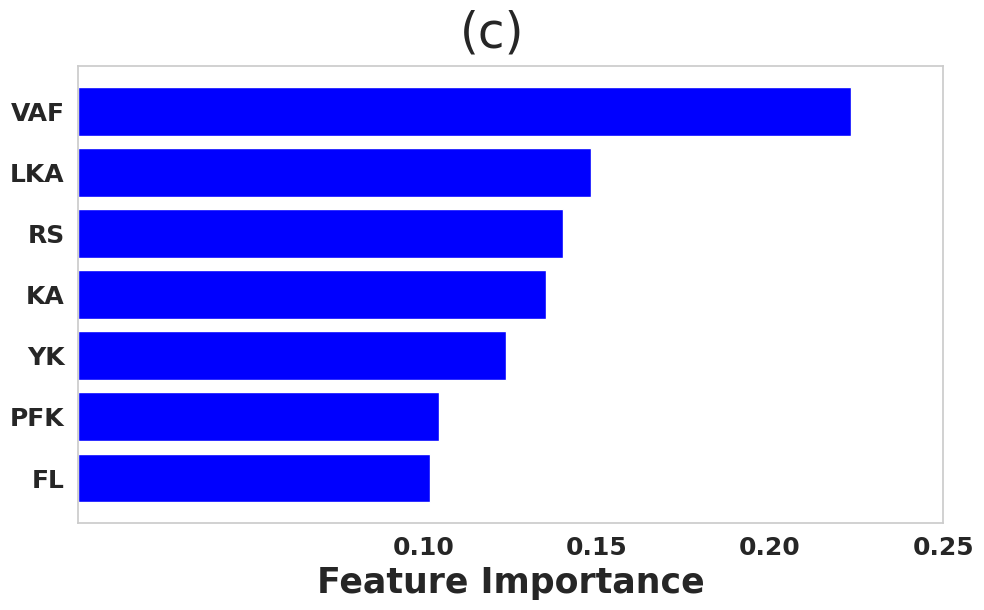

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict

feature='Ngram'
sublabel='(c)'
path = "path"


dr = 0.05  
fonts = 25 

# Sorting and processing feature dictionary


sorted_features = OrderedDict(sorted(featuredict_lasso.items(), key=lambda x: x[1], reverse=False))

feature_name = list(sorted_features.keys())
feature_name = [name.upper() for name in feature_name]

feature_coef = list(sorted_features.values())



# Plot of feature importance
fig, ax = plt.subplots(figsize=(10, 6)) 
plt.barh(feature_name, feature_coef, color='blue')
ax.set_xticks(np.arange(np.round(min(feature_coef), 2), np.round(max(feature_coef), 2) + dr, dr))

# Set grid and labels
plt.grid(False)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Label and title settings
plt.xlabel("Feature Importance", fontsize=fonts, fontweight='bold')
plt.figtext(0.5, 0.95, sublabel, size=35, ha='center')  
plt.tick_params(labelsize=18)

# Set layout before saving to avoid clipping
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig(path + 'Features_' + feature + '_' + tcr + '.pdf', format='pdf', bbox_inches='tight') 
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler

ns=10

scaled_features_df=X1
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
i=0
for train_index, test_index in cv.split(XX, y):

    Xtrain_cv[i] = X[train_index]
    Xtest_cv[i] = X[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    #print(X_test)
    scaler = MinMaxScaler()
    Xtrain_cv[i]  = scaler.fit_transform(Xtrain_cv[i])
    Xtest_cv[i]  = scaler.fit_transform(Xtest_cv[i])
    #print(Xtest_cv[i])
   
    fold_num += 1  
    i+=1
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
 
    results = models_overfitting(Xtrain_cv[i] , Ytrain_cv[i], Xtest_cv[i], Ytest_cv[i])
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']



Processing cross validation for fold: 1
Logistic Regression train_precision: 0.9490
Logistic Regression test_precision: 0.7959
Logistic Regression train_accuracy: 0.9706
Logistic Regression test_accuracy: 0.8085
Logistic Regression train_recall: 0.9706
Logistic Regression test_recall: 0.8085
Logistic Regression train_mcc: 0.9423
Logistic Regression test_mcc: 0.6176
Logistic Regression train_f1: 0.9713
Logistic Regression test_f1: 0.8125


SVC train_precision: 0.9184
SVC test_precision: 0.8163
SVC train_accuracy: 0.9385
SVC test_accuracy: 0.8298
SVC train_recall: 0.9385
SVC test_recall: 0.8298
SVC train_mcc: 0.8780
SVC test_mcc: 0.6602
SVC train_f1: 0.9399
SVC test_f1: 0.8333


Processing cross validation for fold: 2
Logistic Regression train_precision: 0.9538
Logistic Regression test_precision: 0.8542
Logistic Regression train_accuracy: 0.9733
Logistic Regression test_accuracy: 0.8617
Logistic Regression train_recall: 0.9733
Logistic Regression test_recall: 0.8617
Logistic Regression t

<ipython-input-59-52811cf5395e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)
<ipython-input-59-52811cf5395e>:27: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)
<ipython-input-59-52811cf5395e>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)


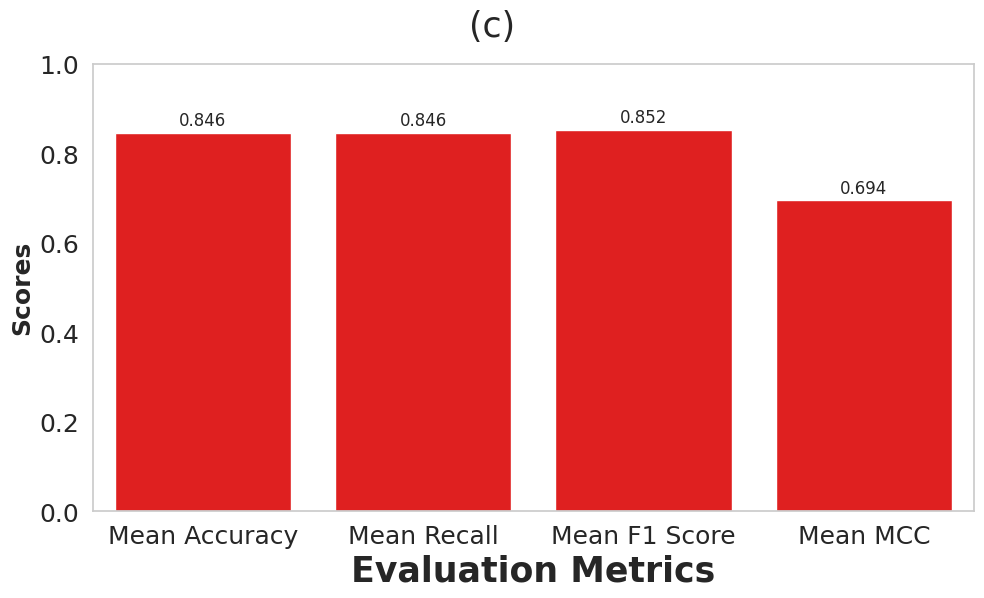

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
metrics = ['Mean Accuracy', 'Mean Recall', 'Mean F1 Score', 'Mean MCC']
log_regression = [ mean_accu_log/ns, mean_recall_log/ns, mean_f1_log/ns, mean_mcc_log/ns]


data = {
    'Metrics': metrics,
    'Logistic Regression': log_regression
}

df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Metrics', var_name='Model', value_name='Score')

# Set the plot style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Barplot with seaborn
sns.barplot(x='Metrics', y='Score', data=df_melted, palette=['red']).set_xticklabels(df['Metrics'], fontsize=15)
plt.xlabel('Evaluation Metrics', fontsize=25, fontweight='bold')
plt.ylabel('Scores', fontsize=18, fontweight='bold')

plt.ylim(0, 1.0)  

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.3f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

plt.figtext(0.5, 0.95, sublabel, size=25, ha='center')
plt.tick_params(labelsize=18)
plt.grid(False)
plt.tight_layout(rect=[0, 0, 1, 0.95])  

# Save the figure
#plt.savefig(path + 'Evaluation_' + feature + '_' + tcr + '.pdf', format='pdf')

plt.show()

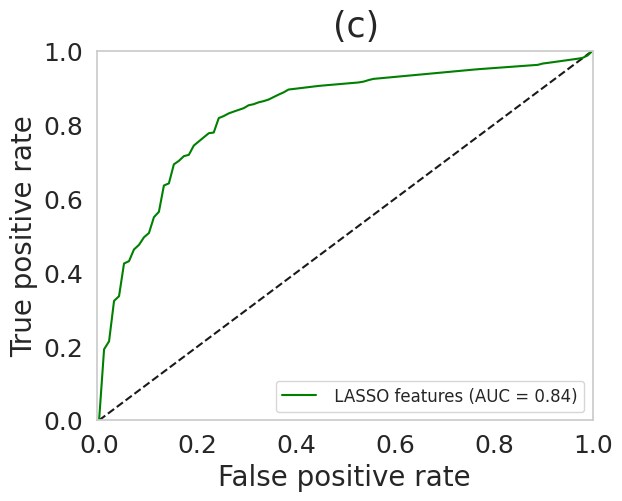

0.835219556360344

In [ ]:
mean_auc1 = plot_roc_curve(df_final, featuredict_lasso, y,ns)
mean_auc1